## Training a Deep Convolutional GAN to generate clothes from FashionMNIST Dataset
### by Satyam Chatrola (sc10247@nyu.edu)

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import random

In [27]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)


In [28]:
# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 7*7*256, bias=False),
            nn.BatchNorm1d(7*7*256),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Unflatten(1, (256, 7, 7)),
            nn.ConvTranspose2d(256, 128, kernel_size=5, stride=1, padding=2, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.3, inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.3, inplace=True),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Dropout(0.3),
            nn.Flatten(),
            nn.Linear(128*7*7, 1)
        )

    def forward(self, x):
        return self.model(x)


In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizers
lr = 1e-4
opt_g = optim.Adam(generator.parameters(), lr=lr)
opt_d = optim.Adam(discriminator.parameters(), lr=lr)


In [33]:
# printing Generator architecture
generator

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=12544, bias=False)
    (1): BatchNorm1d(12544, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.3, inplace=True)
    (3): Unflatten(dim=1, unflattened_size=(256, 7, 7))
    (4): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.3, inplace=True)
    (7): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1), bias=False)
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.3, inplace=True)
    (10): ConvTranspose2d(64, 1, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1), bias=False)
    (11): Tanh()
  )
)

In [34]:
# printing Discriminator architecture
discriminator

Discriminator(
  (model): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.3, inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (4): LeakyReLU(negative_slope=0.3, inplace=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=6272, out_features=1, bias=True)
  )
)

In [30]:
# Load FashionMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


Epoch [1/50], Loss D: 0.9045, Loss G: 1.6303
Epoch [2/50], Loss D: 1.2627, Loss G: 1.2180
Epoch [3/50], Loss D: 1.0855, Loss G: 1.4690
Epoch [4/50], Loss D: 0.9610, Loss G: 1.6973
Epoch [5/50], Loss D: 0.8088, Loss G: 1.5345
Epoch [6/50], Loss D: 0.9025, Loss G: 1.5874
Epoch [7/50], Loss D: 0.4743, Loss G: 2.1569
Epoch [8/50], Loss D: 0.5500, Loss G: 1.9582
Epoch [9/50], Loss D: 0.7718, Loss G: 1.9847
Epoch [10/50], Loss D: 0.9657, Loss G: 1.7686


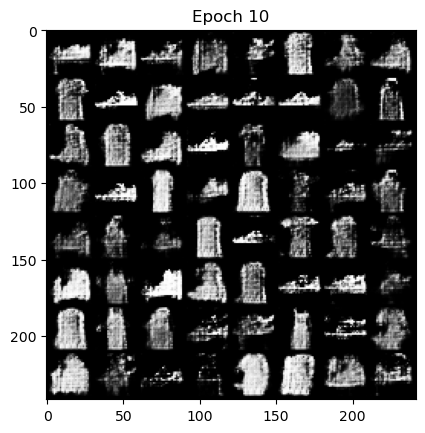

Epoch [11/50], Loss D: 0.6810, Loss G: 1.8076
Epoch [12/50], Loss D: 0.7625, Loss G: 1.8926
Epoch [13/50], Loss D: 1.0956, Loss G: 1.4703
Epoch [14/50], Loss D: 0.9727, Loss G: 1.5854
Epoch [15/50], Loss D: 1.1686, Loss G: 1.5193
Epoch [16/50], Loss D: 1.1785, Loss G: 1.4244
Epoch [17/50], Loss D: 1.1021, Loss G: 1.3128
Epoch [18/50], Loss D: 0.9342, Loss G: 1.5608
Epoch [19/50], Loss D: 0.6992, Loss G: 1.3643
Epoch [20/50], Loss D: 1.1489, Loss G: 1.1419
Epoch [21/50], Loss D: 1.0333, Loss G: 1.2176
Epoch [22/50], Loss D: 1.0509, Loss G: 1.5159
Epoch [23/50], Loss D: 1.0047, Loss G: 1.1651
Epoch [24/50], Loss D: 1.1274, Loss G: 1.3490
Epoch [25/50], Loss D: 0.9727, Loss G: 1.4722
Epoch [26/50], Loss D: 1.1338, Loss G: 1.0190
Epoch [27/50], Loss D: 0.9836, Loss G: 1.3957
Epoch [28/50], Loss D: 1.1973, Loss G: 1.0998
Epoch [29/50], Loss D: 1.2911, Loss G: 1.1240
Epoch [30/50], Loss D: 0.9428, Loss G: 1.2093


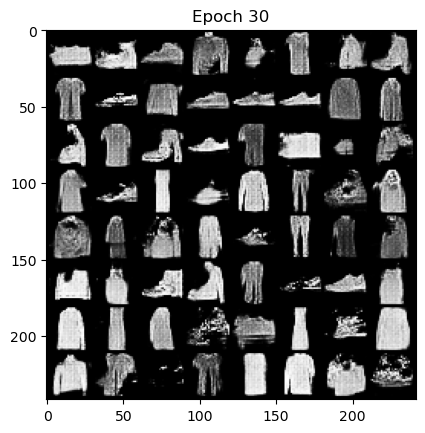

Epoch [31/50], Loss D: 0.9904, Loss G: 1.2380
Epoch [32/50], Loss D: 1.1828, Loss G: 1.5050
Epoch [33/50], Loss D: 1.1000, Loss G: 1.2693
Epoch [34/50], Loss D: 1.0154, Loss G: 1.1124
Epoch [35/50], Loss D: 1.2836, Loss G: 1.2001
Epoch [36/50], Loss D: 1.2991, Loss G: 1.1644
Epoch [37/50], Loss D: 1.0103, Loss G: 1.0418
Epoch [38/50], Loss D: 1.2074, Loss G: 1.2355
Epoch [39/50], Loss D: 1.1855, Loss G: 1.1058
Epoch [40/50], Loss D: 0.9381, Loss G: 1.8762
Epoch [41/50], Loss D: 1.0048, Loss G: 1.3852
Epoch [42/50], Loss D: 1.1092, Loss G: 1.1980
Epoch [43/50], Loss D: 1.2804, Loss G: 1.2427
Epoch [44/50], Loss D: 1.2359, Loss G: 1.0299
Epoch [45/50], Loss D: 1.2767, Loss G: 1.1845
Epoch [46/50], Loss D: 0.9976, Loss G: 1.1347
Epoch [47/50], Loss D: 1.2382, Loss G: 1.0982
Epoch [48/50], Loss D: 1.0283, Loss G: 1.0248
Epoch [49/50], Loss D: 1.3469, Loss G: 1.1415
Epoch [50/50], Loss D: 1.1081, Loss G: 0.9858


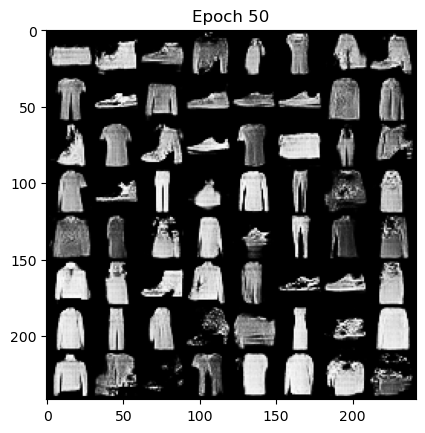

In [31]:
# Creating a GAN training routine
def train_gan(epochs, dataloader):
    fixed_noise = torch.randn(64, 100, device=device)
    generator_losses = []
    discriminator_losses = []

    for epoch in range(epochs):
        g_loss_epoch = 0.0
        d_loss_epoch = 0.0
        
        for i, (images, _) in enumerate(dataloader):
            images = images.to(device)
            batch_size = images.size(0)

            # Labels for real and fake images
            real_labels = torch.ones(batch_size, device=device)
            fake_labels = torch.zeros(batch_size, device=device)

            # Discriminator training
            discriminator.zero_grad()
            outputs_real = discriminator(images).squeeze()
            loss_real = criterion(outputs_real, real_labels)

            noise = torch.randn(batch_size, 100, device=device)
            fake_images = generator(noise)
            outputs_fake = discriminator(fake_images.detach()).squeeze()
            loss_fake = criterion(outputs_fake, fake_labels)

            loss_d = loss_real + loss_fake
            loss_d.backward()
            opt_d.step()

            # Generator training
            generator.zero_grad()
            outputs_fake = discriminator(fake_images).squeeze()
            loss_g = criterion(outputs_fake, real_labels)
            loss_g.backward()
            opt_g.step()

            # Track losses
            g_loss_epoch += loss_g.item()
            d_loss_epoch += loss_d.item()

        generator_losses.append(g_loss_epoch / len(dataloader))
        discriminator_losses.append(d_loss_epoch / len(dataloader))

        print(f"Epoch [{epoch+1}/{epochs}], Loss D: {loss_d.item():.4f}, Loss G: {loss_g.item():.4f}")

        if epoch + 1 in [10, 30, 50]:
            with torch.no_grad():
                fake_samples = generator(fixed_noise).cpu()
                grid = make_grid(fake_samples, nrow=8, normalize=True)
                plt.imshow(grid.permute(1, 2, 0))
                plt.title(f"Epoch {epoch+1}")
                plt.show()

    return generator_losses, discriminator_losses
    
# Train the GAN for 50 epochs
generator_losses, discriminator_losses = train_gan(50, dataloader)

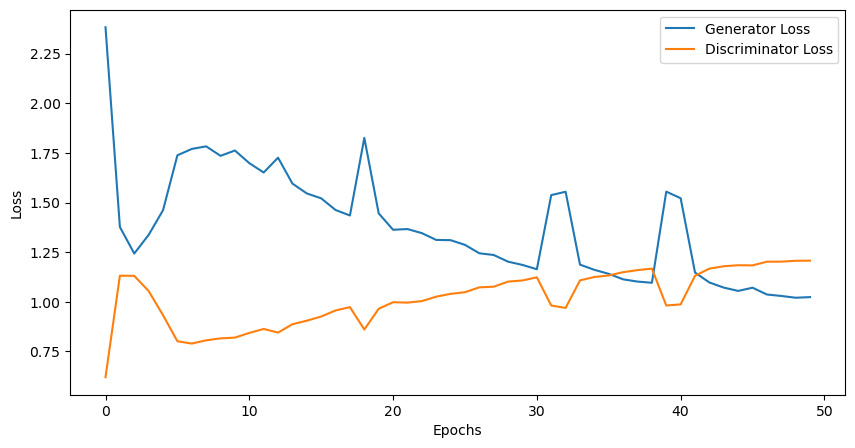

In [32]:
# Plotting the Generator and Discriminator Losses
plt.figure(figsize=(10, 5))
plt.plot(generator_losses, label="Generator Loss")
plt.plot(discriminator_losses, label="Discriminator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Explanation:

The set_seed function ensures consistent results by fixing the random seed for all relevant libraries, which makes the results reproducible.

The generator is tasked with creating synthetic images from random noise. It uses the following layers:
- Dense layer that maps a 100-dimensional noise vector to a 7×7×256 feature map.
- Transpose convolutional layers (deconvolutions) progressively upsample the feature map to 28×28, the size of FashionMNIST images.
- Batch normalization layers ensure stable training, while the final activation layer (Tanh) ensures the output range is between [−1,1].

The discriminator distinguishes between real and synthetic images. It has two convolutional layers with the following configurations:
- First layer: 1×28×28 => 64×14×14
- Second layer: 64×14×14 => 128×7×7
- The output is flattened and passed to a linear layer for binary classification.

Binary Cross Entropy (BCE) is used as the loss function, and the Adam optimizer is employed for both the generator and discriminator, each with a learning rate of 1e−4.
 

The FashionMNIST dataset is normalized to the range [−1,1] to match the generator's output range.

For each batch:
- Train the Discriminator: Update the discriminator to classify real and fake images.
- Train the Generator: Update the generator to produce more convincing fake images.
- Intermediate outputs are visualized at epochs 10, 30, and 50.

### Loss vs Epoch Graph:
- Discriminator Loss: It initially drops significantly due to the discriminator's ability to distinguish real and synthetic images. The loss then stabilizes as the generator improves, creating more realistic images.
- Generator Loss: It starts high as the generator struggles to create convincing images, but gradually decreases as training progresses.

- There is some oscillation in both generator and discriminator losses, which is typical of GAN training due to the adversarial nature of the problem.
- The intersection of losses between the generator and the discriminator suggests a balanced adversarial relationship.